# Analysis of budgetary values in notices (with simplified dataset)

In [1]:
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Dataset loading

In [2]:
notice_type_to_parent = {
    "Call for expressions of interest": "Prior Information Notice",
    "Prior Information Notice": "Prior Information Notice",
    "Prior information notice with call for competition": "Prior Information Notice",
    "Periodic indicative notice with call for competition": "Prior Information Notice",
    "Prior information notice without call for competition": "Prior Information Notice",
    "Contract notice": "Contract Notice",
    "Prequalification notices": "Contract Notice",
    "General information": "Contract Notice",
    "Public works concession": "Contract Notice",
    "Services concession": "Contract Notice",
    "Request for proposals": "Contract Notice",
    "Not applicable": "Contract Notice",
    "Dynamic purchasing system": "Contract Notice",
    "Contract award": "Contract Award Notice",
    "Concession award notice": "Contract Award Notice",
    "Contract award notice": "Contract Award Notice",
    "Additional information": "Change Notice",
    "Corrigenda": "Change Notice",
    "Corrigendum": "Change Notice",
    "Modification of a contract/concession during its term": "Change Notice",
}

In [3]:
def parse_notice_id(notice_id: str) -> str | None:
    if pd.isna(notice_id):
        return None
    return f"{notice_id.split('-')[-1]}-{notice_id.split('/')[0]}" if notice_id else ""


df = pd.read_csv("tmp/20230608-notice-budgetary-values-simple.csv", dtype={
    "notice_id": "string",
    "notice_type": "string",
    "publication_date": "Int32",
    "reference_notice_id": "string",
    "version": "string",
    "object_type": "string",
    "lot": "string",
    "estimated_value": "Float32",
    "estimated_value_currency": "string",
    "min_value": "Float32",
    "min_value_currency": "string",
    "max_value": "Float32",
    "max_value_currency": "string",
    "main_notice_type": "string",
})
df["reference_notice_id"] = df["reference_notice_id"].apply(parse_notice_id)
df["main_notice_type"] = df["notice_type"].apply(notice_type_to_parent.get)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67696 entries, 0 to 67695
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   notice_id                 67694 non-null  string 
 1   notice_type               67694 non-null  string 
 2   publication_date          67694 non-null  Int32  
 3   reference_notice_id       31532 non-null  object 
 4   version                   67684 non-null  string 
 5   object_type               67696 non-null  string 
 6   lot                       23363 non-null  string 
 7   estimated_value           20460 non-null  Float32
 8   estimated_value_currency  21860 non-null  string 
 9   min_value                 21224 non-null  Float32
 10  min_value_currency        21241 non-null  string 
 11  max_value                 21224 non-null  Float32
 12  max_value_currency        21241 non-null  string 
 13  main_notice_type          67694 non-null  object 
dtypes: Flo

notice_id             notice_type  publication_date reference_notice_id  \
0  260146-2021         Contract notice          20210525         114530-2021   
1  448671-2015         Contract notice          20151222                None   
2  450794-2016   Contract award notice          20161222                None   
3  064176-2015         Contract notice          20150224                None   
4  181172-2020  Additional information          20200420         105610-2020   

          version  object_type   lot  estimated_value  \
0  R2.0.9.S04.E01  PROCUREMENT  <NA>       15200000.0   
1  R2.0.8.S02.E01  PROCUREMENT  <NA>             <NA>   
2  R2.0.9.S01.E01  PROCUREMENT  <NA>             <NA>   
3  R2.0.8.S02.E01  PROCUREMENT  <NA>             <NA>   
4  R2.0.8.S04.E01  PROCUREMENT  <NA>             <NA>   

  estimated_value_currency  min_value min_value_currency  max_value  \
0                      EUR       <NA>               <NA>       <NA>   
1                     <NA>       <NA>               <NA>       <NA>   
2                     <NA>   220100.0                EUR   220100.0   
3                     <NA>   400000.0                EUR   400000.0   
4                     <NA>       <NA>               <NA>       <NA>   

  max_value_currency       main_notice_type  
0               <NA>        Contract Notice  
1               <NA>        Contract Notice  
2                EUR  Contract Award Notice  
3                EUR        Contract Notice  
4               <NA>          Change Notice

In [4]:
notice_df = df[df["object_type"] == "PROCUREMENT"]
notice_df.info()
notice_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 44300 entries, 0 to 67695
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   notice_id                 44298 non-null  string 
 1   notice_type               44298 non-null  string 
 2   publication_date          44298 non-null  Int32  
 3   reference_notice_id       21164 non-null  object 
 4   version                   44290 non-null  string 
 5   object_type               44300 non-null  string 
 6   lot                       0 non-null      string 
 7   estimated_value           12512 non-null  Float32
 8   estimated_value_currency  13912 non-null  string 
 9   min_value                 13488 non-null  Float32
 10  min_value_currency        13489 non-null  string 
 11  max_value                 13488 non-null  Float32
 12  max_value_currency        13489 non-null  string 
 13  main_notice_type          44298 non-null  object 
dtypes: Float32(

notice_id             notice_type  publication_date reference_notice_id  \
0  260146-2021         Contract notice          20210525         114530-2021   
1  448671-2015         Contract notice          20151222                None   
2  450794-2016   Contract award notice          20161222                None   
3  064176-2015         Contract notice          20150224                None   
4  181172-2020  Additional information          20200420         105610-2020   

          version  object_type   lot  estimated_value  \
0  R2.0.9.S04.E01  PROCUREMENT  <NA>       15200000.0   
1  R2.0.8.S02.E01  PROCUREMENT  <NA>             <NA>   
2  R2.0.9.S01.E01  PROCUREMENT  <NA>             <NA>   
3  R2.0.8.S02.E01  PROCUREMENT  <NA>             <NA>   
4  R2.0.8.S04.E01  PROCUREMENT  <NA>             <NA>   

  estimated_value_currency  min_value min_value_currency  max_value  \
0                      EUR       <NA>               <NA>       <NA>   
1                     <NA>       <NA>               <NA>       <NA>   
2                     <NA>   220100.0                EUR   220100.0   
3                     <NA>   400000.0                EUR   400000.0   
4                     <NA>       <NA>               <NA>       <NA>   

  max_value_currency       main_notice_type  
0               <NA>        Contract Notice  
1               <NA>        Contract Notice  
2                EUR  Contract Award Notice  
3                EUR        Contract Notice  
4               <NA>          Change Notice

In [5]:
notice_types = [
    'Prior Information Notice',
    'Contract Notice',
    'Contract Award Notice',
    'Change Notice',
]

## Analysis per notice

### Value presence

In [6]:
min_or_max_missing_count = (notice_df["min_value"].notna() ^ notice_df["max_value"].notna()).sum()
print(f"{min_or_max_missing_count} notices with min value and not max value, or max value and not min value")

0 notices with min value and not max value, or max value and not min value


In [7]:
filtered_df = notice_df[notice_df["min_value"].notna() & notice_df["max_value"].notna()]
min_max_equal_count = (filtered_df["min_value"] != filtered_df["max_value"]).sum()
total_count = len(filtered_df)
print(f"{100 * min_max_equal_count / total_count}% of notices have different actual min and max values")

7.391755634638197% of notices have different actual min and max values


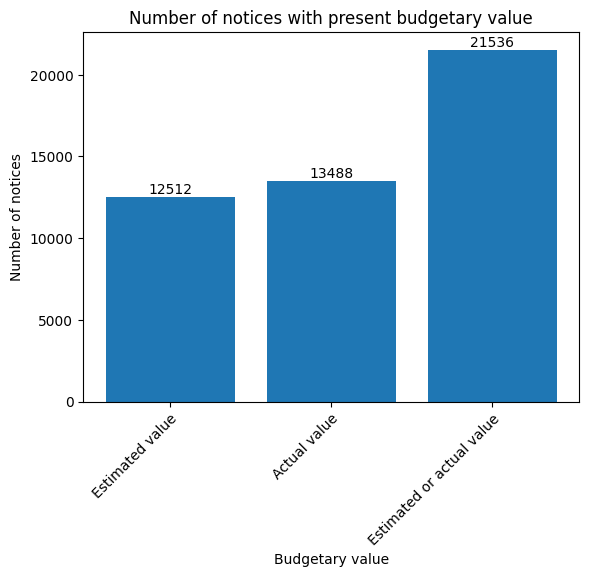

In [8]:
data = {
    "Estimated value": notice_df["estimated_value"].notna().sum(),
    "Actual value": notice_df["max_value"].notna().sum(),
    "Estimated or actual value": (notice_df["estimated_value"].notna() | notice_df["max_value"].notna()).sum(),
}

rects = plt.bar(data.keys(), data.values())
plt.bar_label(rects)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Number of notices with present budgetary value")
plt.xlabel("Budgetary value")
plt.ylabel("Number of notices")
plt.show()

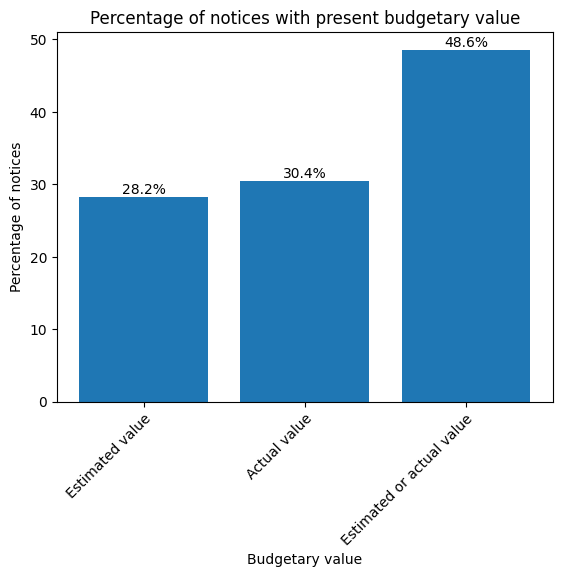

In [9]:
data = {
    "Estimated value": 100 * notice_df["estimated_value"].notna().sum() / len(notice_df),
    "Actual value": 100 * notice_df["max_value"].notna().sum() / len(notice_df),
    "Estimated or actual value": 100 * (notice_df["estimated_value"].notna() | notice_df["max_value"].notna()).sum()
                                 / len(notice_df),
}

rects = plt.bar(data.keys(), data.values())
plt.bar_label(rects, fmt='%.1f%%')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Percentage of notices with present budgetary value")
plt.xlabel("Budgetary value")
plt.ylabel("Percentage of notices")
plt.show()

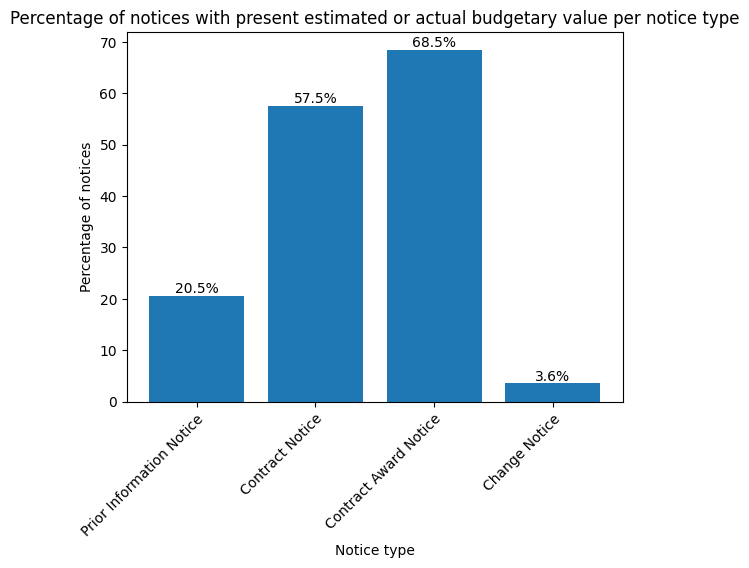

In [10]:
data = {
    t: 100 * (
            notice_df[notice_df["main_notice_type"] == t]["estimated_value"].notna()
            | notice_df[notice_df["main_notice_type"] == t]["max_value"].notna()
    ).sum() / len(notice_df[notice_df["main_notice_type"] == t])
    for t in notice_types
}

rects = plt.bar(data.keys(), data.values())
plt.bar_label(rects, fmt='%.1f%%')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Percentage of notices with present estimated or actual budgetary value per notice type")
plt.xlabel("Notice type")
plt.ylabel("Percentage of notices")
plt.show()

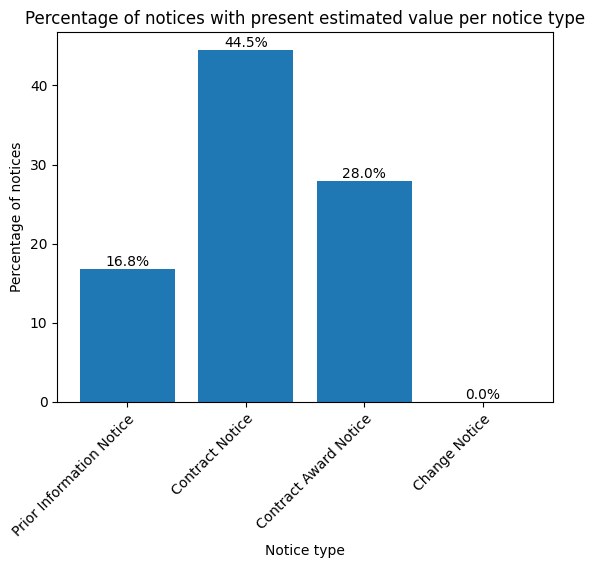

In [11]:
data = {
    t: 100 * notice_df[notice_df["main_notice_type"] == t]["estimated_value"].notna().sum()
       / len(notice_df[notice_df["main_notice_type"] == t])
    for t in notice_types
}

rects = plt.bar(data.keys(), data.values())
plt.bar_label(rects, fmt='%.1f%%')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Percentage of notices with present estimated value per notice type")
plt.xlabel("Notice type")
plt.ylabel("Percentage of notices")
plt.show()

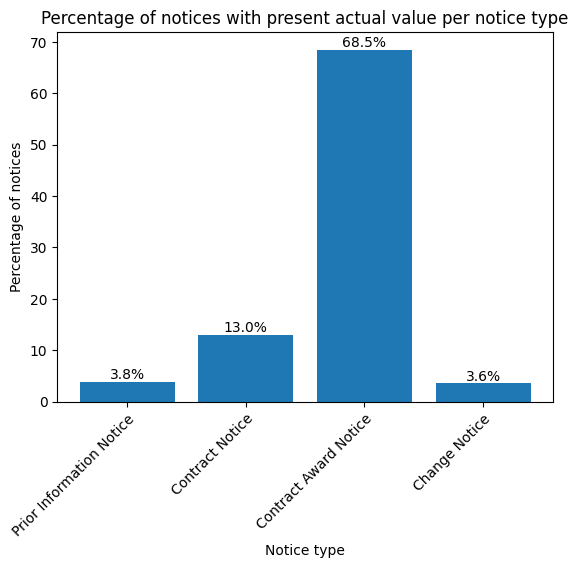

In [12]:
data = {
    t: 100 * notice_df[notice_df["main_notice_type"] == t]["max_value"].notna().sum()
       / len(notice_df[notice_df["main_notice_type"] == t])
    for t in notice_types
}

rects = plt.bar(data.keys(), data.values())
plt.bar_label(rects, fmt='%.1f%%')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Percentage of notices with present actual value per notice type")
plt.xlabel("Notice type")
plt.ylabel("Percentage of notices")
plt.show()

### Currency analysis

In [13]:
different_actual_currency = (notice_df["min_value_currency"] != notice_df["max_value_currency"]).sum()
print(f"{different_actual_currency} notices with different currency for min and max actual value")

0 notices with different currency for min and max actual value


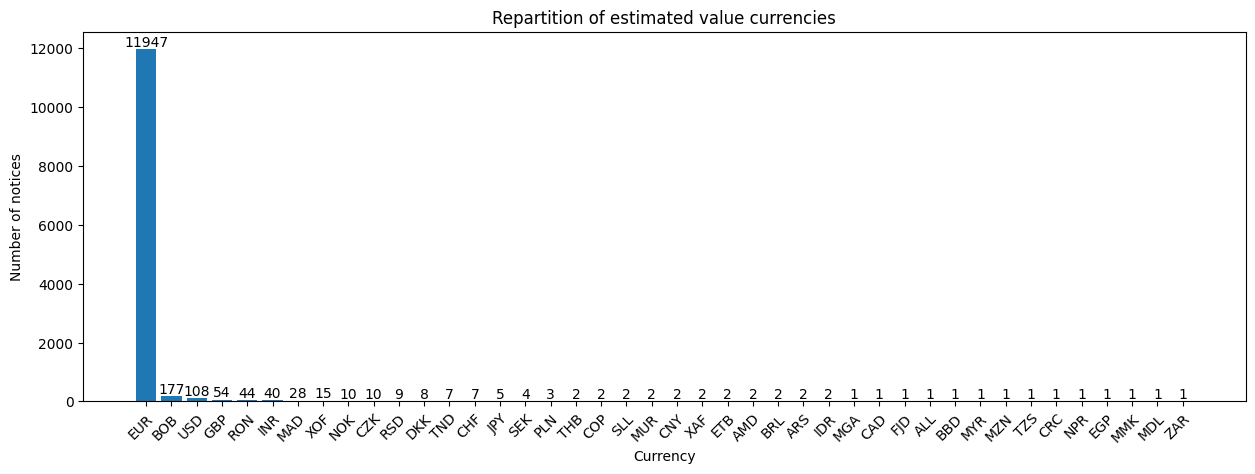

In [14]:
data = notice_df[notice_df["estimated_value"].notna()]["estimated_value_currency"].value_counts()

plt.figure(figsize=(15, 4.8))
rects = plt.bar(data.index.values, data.values)
plt.bar_label(rects)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Repartition of estimated value currencies")
plt.xlabel("Currency")
plt.ylabel("Number of notices")
plt.show()

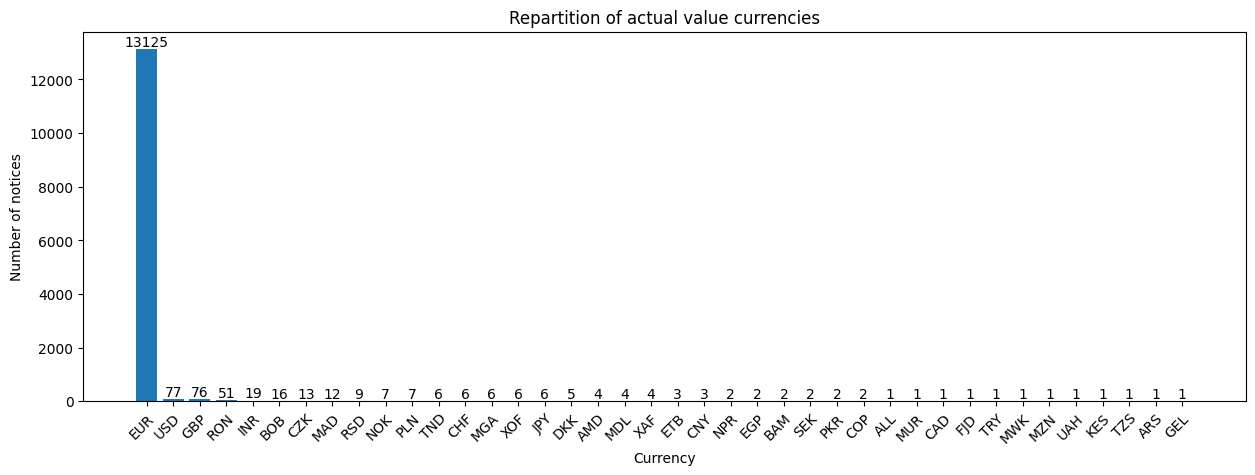

In [15]:
data = notice_df["max_value_currency"].value_counts()

plt.figure(figsize=(15, 4.8))
rects = plt.bar(data.index.values, data.values)
plt.bar_label(rects)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Repartition of actual value currencies")
plt.xlabel("Currency")
plt.ylabel("Number of notices")
plt.show()

### Repartition of values

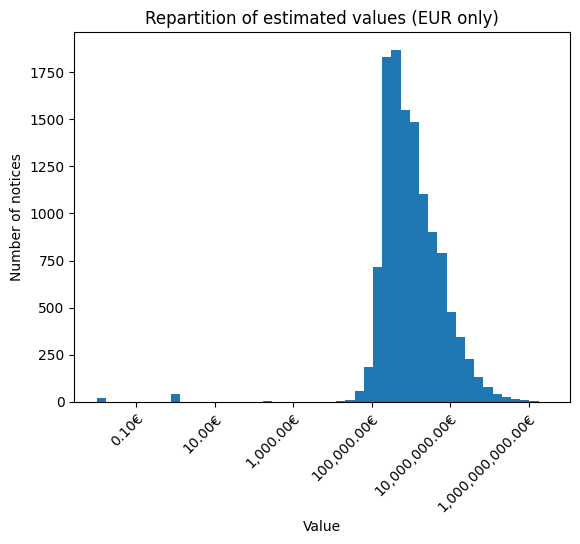

In [16]:
filter_ = (notice_df["estimated_value_currency"] == "EUR") & notice_df["estimated_value"].notna()
data = notice_df[filter_]["estimated_value"]

plt.hist(data, bins=np.logspace(np.log10(data.min()), np.log10(data.max()), 50))
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x:,.2f}€"))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title(f"Repartition of estimated values (EUR only)")
plt.xlabel("Value")
plt.ylabel("Number of notices")
plt.show()

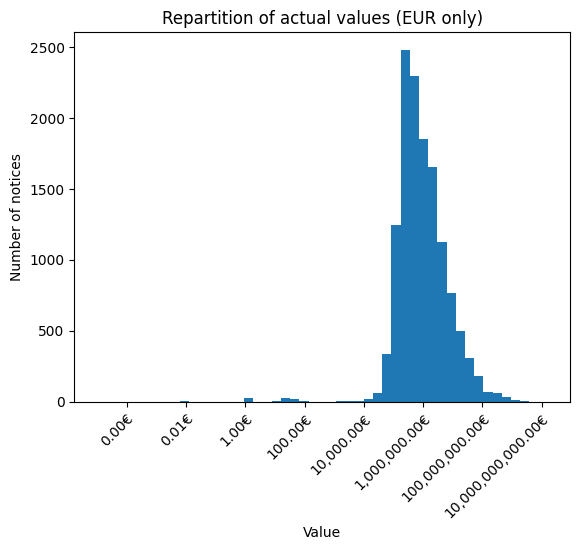

In [17]:
filter_ = (notice_df["max_value_currency"] == "EUR") & notice_df["max_value"].notna()
data = notice_df[filter_]["max_value"]

plt.hist(data, bins=np.logspace(np.log10(data.min() + 0.00001), np.log10(data.max()), 50))
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x:,.2f}€"))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title(f"Repartition of actual values (EUR only)")
plt.xlabel("Value")
plt.ylabel("Number of notices")
plt.show()

### Invalid values

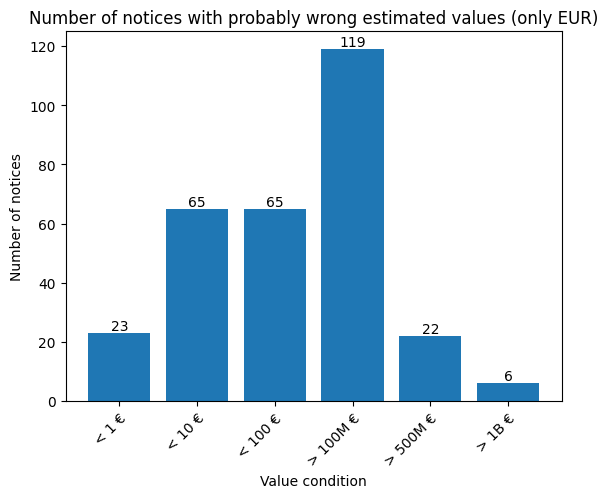

In [18]:
def notice_count_with_estimated_value_lower_than(value: float) -> int:
    return ((notice_df["estimated_value_currency"] == "EUR")
            & notice_df["estimated_value"].notna()
            & (notice_df["estimated_value"] < value)).sum()


def notice_count_with_estimated_value_greater_than(value: float) -> int:
    return ((notice_df["estimated_value_currency"] == "EUR")
            & notice_df["estimated_value"].notna()
            & (notice_df["estimated_value"] > value)).sum()


data = {
    '< 1 €': notice_count_with_estimated_value_lower_than(1),
    '< 10 €': notice_count_with_estimated_value_lower_than(10),
    '< 100 €': notice_count_with_estimated_value_lower_than(100),
    '> 100M €': notice_count_with_estimated_value_greater_than(100000000),
    '> 500M €': notice_count_with_estimated_value_greater_than(500000000),
    '> 1B €': notice_count_with_estimated_value_greater_than(1000000000),
}

rects = plt.bar(data.keys(), data.values())
plt.bar_label(rects)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Number of notices with probably wrong estimated values (only EUR)")
plt.xlabel("Value condition")
plt.ylabel("Number of notices")
plt.show()

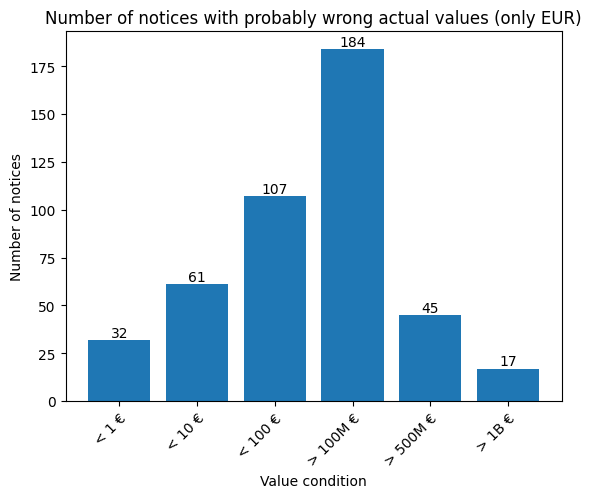

In [19]:
def notice_count_with_actual_value_lower_than(value: float) -> int:
    return ((notice_df["max_value_currency"] == "EUR")
            & notice_df["max_value"].notna()
            & (notice_df["max_value"] < value)).sum()


def notice_count_with_actual_value_greater_than(value: float) -> int:
    return ((notice_df["max_value_currency"] == "EUR")
            & notice_df["max_value"].notna()
            & (notice_df["max_value"] > value)).sum()


data = {
    '< 1 €': notice_count_with_actual_value_lower_than(1),
    '< 10 €': notice_count_with_actual_value_lower_than(10),
    '< 100 €': notice_count_with_actual_value_lower_than(100),
    '> 100M €': notice_count_with_actual_value_greater_than(100000000),
    '> 500M €': notice_count_with_actual_value_greater_than(500000000),
    '> 1B €': notice_count_with_actual_value_greater_than(1000000000),
}

rects = plt.bar(data.keys(), data.values())
plt.bar_label(rects)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Number of notices with probably wrong actual values (only EUR)")
plt.xlabel("Value condition")
plt.ylabel("Number of notices")
plt.show()

In [20]:
min_greater_than_max_count = (notice_df["min_value"].notna()
                              & notice_df["max_value"].notna()
                              & (notice_df["min_value"] > notice_df["max_value"])).sum()
print(f"{min_greater_than_max_count} notices have min value greater than max value")

0 notices have min value greater than max value


## Analysis per procurement

### Dataset generation

In [21]:
number_to_ref = dict(zip(notice_df["notice_id"], notice_df["reference_notice_id"]))

In [22]:
def filter_value(row: pd.Series, src_col: str, types_: list[str, ...]) -> float | None:
    return row[src_col] if row["main_notice_type"] in types_ else None


def find_first_ref_number(ref_notice_number: str | float) -> str | None:
    if not ref_notice_number:
        return None
    inner_ref_notice_number = number_to_ref.get(ref_notice_number)
    if not inner_ref_notice_number:
        return ref_notice_number
    return find_first_ref_number(inner_ref_notice_number)


pin_cn_types = ["Prior Information Notice", "Contract Notice"]
can_types = ["Contract Award Notice"]

tmp_df = notice_df.sort_values("publication_date")
tmp_df["main_reference_notice_id"] = tmp_df["reference_notice_id"].apply(find_first_ref_number)
tmp_df["main_reference_notice_id"] = tmp_df["main_reference_notice_id"].fillna(tmp_df["notice_id"])
tmp_df["pin_cn_estimated_value"] = tmp_df.apply(lambda r: filter_value(r, "estimated_value", pin_cn_types), axis=1)
tmp_df["pin_cn_estimated_value_currency"] = tmp_df.apply(
    lambda r: filter_value(r, "estimated_value_currency", pin_cn_types), axis=1)
tmp_df["pin_cn_min_value"] = tmp_df.apply(lambda r: filter_value(r, "min_value", pin_cn_types), axis=1)
tmp_df["pin_cn_min_value_currency"] = tmp_df.apply(lambda r: filter_value(r, "min_value_currency", pin_cn_types),
                                                   axis=1)
tmp_df["pin_cn_max_value"] = tmp_df.apply(lambda r: filter_value(r, "max_value", pin_cn_types), axis=1)
tmp_df["pin_cn_max_value_currency"] = tmp_df.apply(lambda r: filter_value(r, "max_value_currency", pin_cn_types),
                                                   axis=1)
tmp_df["can_estimated_value"] = tmp_df.apply(lambda r: filter_value(r, "estimated_value", can_types), axis=1)
tmp_df["can_estimated_value_currency"] = tmp_df.apply(lambda r: filter_value(r, "estimated_value_currency", can_types),
                                                      axis=1)
tmp_df["can_min_value"] = tmp_df.apply(lambda r: filter_value(r, "min_value", can_types), axis=1)
tmp_df["can_min_value_currency"] = tmp_df.apply(lambda r: filter_value(r, "min_value_currency", can_types), axis=1)
tmp_df["can_max_value"] = tmp_df.apply(lambda r: filter_value(r, "max_value", can_types), axis=1)
tmp_df["can_max_value_currency"] = tmp_df.apply(lambda r: filter_value(r, "max_value_currency", can_types), axis=1)
tmp_df = tmp_df.drop(
    ["notice_id", "reference_notice_id", "notice_type", "publication_date", "reference_notice_id", "version",
     "object_type", "lot", "estimated_value", "estimated_value_currency", "min_value", "min_value_currency",
     "max_value", "max_value_currency", "main_notice_type"], axis=1)
tmp_df.info()
tmp_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 44300 entries, 27282 to 64902
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   main_reference_notice_id         44298 non-null  object
 1   pin_cn_estimated_value           8047 non-null   object
 2   pin_cn_estimated_value_currency  8047 non-null   object
 3   pin_cn_min_value                 2293 non-null   object
 4   pin_cn_min_value_currency        2293 non-null   object
 5   pin_cn_max_value                 2293 non-null   object
 6   pin_cn_max_value_currency        2293 non-null   object
 7   can_estimated_value              4465 non-null   object
 8   can_estimated_value_currency     5865 non-null   object
 9   can_min_value                    10932 non-null  object
 10  can_min_value_currency           10933 non-null  object
 11  can_max_value                    10932 non-null  object
 12  can_max_value_currency           

main_reference_notice_id pin_cn_estimated_value  \
27282              000001-2014                   <NA>   
51341              087794-2013                   None   
5896               269615-2013                   None   
13032              000008-2014                   <NA>   
62813              000014-2014                   <NA>   

      pin_cn_estimated_value_currency pin_cn_min_value  \
27282                            <NA>             <NA>   
51341                            None             None   
5896                             None             None   
13032                            <NA>             <NA>   
62813                            <NA>         400000.0   

      pin_cn_min_value_currency pin_cn_max_value pin_cn_max_value_currency  \
27282                      <NA>             <NA>                      <NA>   
51341                      None             None                      None   
5896                       None             None                      None   
13032                      <NA>             <NA>                      <NA>   
62813                       EUR         400000.0                       EUR   

      can_estimated_value can_estimated_value_currency can_min_value  \
27282                None                         None          None   
51341                <NA>                         <NA>      677451.0   
5896                 <NA>                         <NA>      146700.0   
13032                None                         None          None   
62813                None                         None          None   

      can_min_value_currency can_max_value can_max_value_currency  
27282                   None          None                   None  
51341                    EUR      677451.0                    EUR  
5896                     EUR      146700.0                    EUR  
13032                   None          None                   None  
62813                   None          None                   None

In [23]:
proc_df = tmp_df.groupby("main_reference_notice_id").agg(
    lambda v: list(filter(pd.notna, v))[-1] if list(filter(pd.notna, v)) else None)
proc_df.info()
proc_df

<class 'pandas.core.frame.DataFrame'>
Index: 24612 entries, 000001-2014 to 734870-2022
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pin_cn_estimated_value           7230 non-null   float64
 1   pin_cn_estimated_value_currency  7230 non-null   object 
 2   pin_cn_min_value                 2106 non-null   float64
 3   pin_cn_min_value_currency        2106 non-null   object 
 4   pin_cn_max_value                 2106 non-null   float64
 5   pin_cn_max_value_currency        2106 non-null   object 
 6   can_estimated_value              4195 non-null   float64
 7   can_estimated_value_currency     5281 non-null   object 
 8   can_min_value                    9835 non-null   float64
 9   can_min_value_currency           9836 non-null   object 
 10  can_max_value                    9835 non-null   float64
 11  can_max_value_currency           9836 non-null   object 
dtypes: floa

pin_cn_estimated_value  \
main_reference_notice_id                           
000001-2014                                  NaN   
000001-2015                                  NaN   
000001-2016                                  NaN   
000001-2017                             360000.0   
000001-2018                                  1.0   
...                                          ...   
732613-2022                             900000.0   
732638-2022                                  NaN   
733481-2022                             850000.0   
733625-2022                                  NaN   
734870-2022                           62245000.0   

                         pin_cn_estimated_value_currency  pin_cn_min_value  \
main_reference_notice_id                                                     
000001-2014                                         None               NaN   
000001-2015                                         None               NaN   
000001-2016                                         None          150000.0   
000001-2017                                          EUR               NaN   
000001-2018                                          EUR               NaN   
...                                                  ...               ...   
732613-2022                                          EUR               NaN   
732638-2022                                         None               NaN   
733481-2022                                          EUR               NaN   
733625-2022                                         None               NaN   
734870-2022                                          EUR               NaN   

                         pin_cn_min_value_currency  pin_cn_max_value  \
main_reference_notice_id                                               
000001-2014                                   None               NaN   
000001-2015                                   None               NaN   
000001-2016                                    EUR          150000.0   
000001-2017                                   None               NaN   
000001-2018                                   None               NaN   
...                                            ...               ...   
732613-2022                                   None               NaN   
732638-2022                                   None               NaN   
733481-2022                                   None               NaN   
733625-2022                                   None               NaN   
734870-2022                                   None               NaN   

                         pin_cn_max_value_currency  can_estimated_value  \
main_reference_notice_id                                                  
000001-2014                                   None                  NaN   
000001-2015                                   None                  NaN   
000001-2016                                    EUR                  NaN   
000001-2017                                   None            6500000.0   
000001-2018                                   None                  NaN   
...                                            ...                  ...   
732613-2022                                   None                  NaN   
732638-2022                                   None                  NaN   
733481-2022                                   None                  NaN   
733625-2022                                   None                  NaN   
734870-2022                                   None                  NaN   

                         can_estimated_value_currency  can_min_value  \
main_reference_notice_id                                               
000001-2014                                      None            NaN   
000001-2015                                      None            NaN   
000001-2016                                      None            NaN   
000001-2017                                       EUR      65

### Value presence

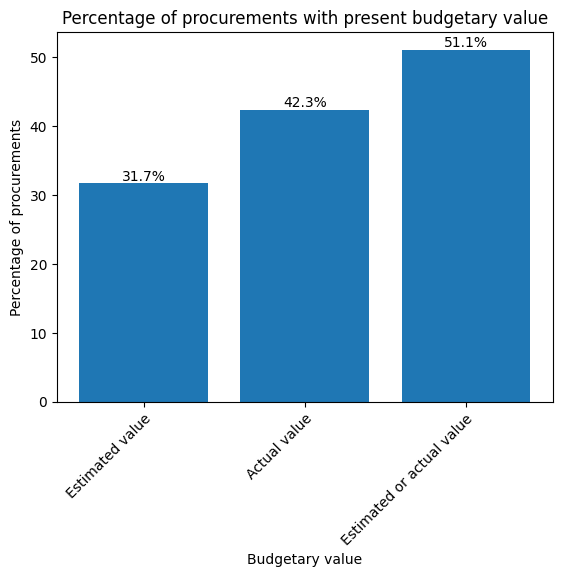

In [24]:
data = {
    "Estimated value": 100 * (
            proc_df["pin_cn_estimated_value"].notna() | proc_df["can_estimated_value"].notna()).sum() / len(
        proc_df),
    "Actual value": 100 * (proc_df["pin_cn_max_value"].notna() | proc_df["can_max_value"].notna()).sum() / len(proc_df),
    "Estimated or actual value": 100 * (
            proc_df["pin_cn_estimated_value"].notna() | proc_df["can_estimated_value"].notna() | proc_df[
        "pin_cn_max_value"].notna() | proc_df["can_max_value"].notna()).sum()
                                 / len(proc_df),
}

rects = plt.bar(data.keys(), data.values())
plt.bar_label(rects, fmt='%.1f%%')
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Percentage of procurements with present budgetary value")
plt.xlabel("Budgetary value")
plt.ylabel("Percentage of procurements")
plt.show()

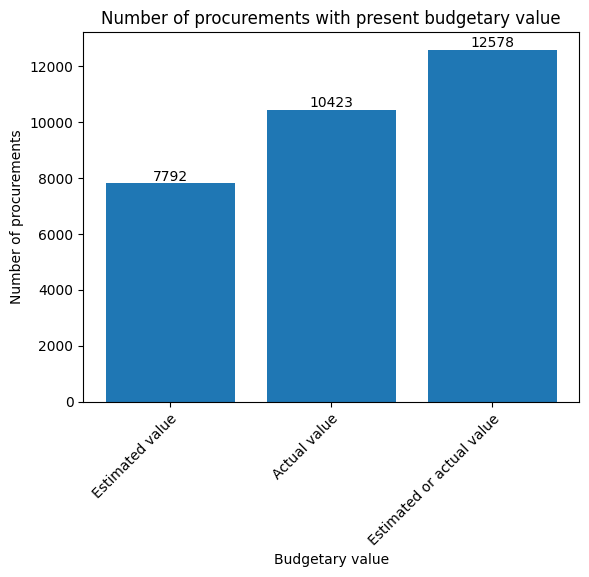

In [25]:
data = {
    "Estimated value": (
            proc_df["pin_cn_estimated_value"].notna() | proc_df["can_estimated_value"].notna()).sum(),
    "Actual value": (proc_df["pin_cn_max_value"].notna() | proc_df["can_max_value"].notna()).sum(),
    "Estimated or actual value": (
            proc_df["pin_cn_estimated_value"].notna() | proc_df["can_estimated_value"].notna() | proc_df[
        "pin_cn_max_value"].notna() | proc_df["can_max_value"].notna()).sum(),
}

rects = plt.bar(data.keys(), data.values())
plt.bar_label(rects)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title("Number of procurements with present budgetary value")
plt.xlabel("Budgetary value")
plt.ylabel("Number of procurements")
plt.show()

### Difference between actual and estimated values

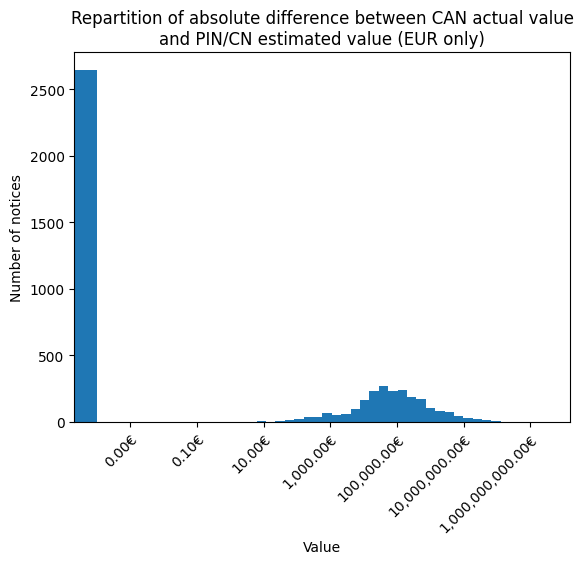

In [94]:
filter_ = (proc_df["can_max_value_currency"] == "EUR") & (proc_df["pin_cn_estimated_value_currency"] == "EUR") & (
        proc_df["pin_cn_estimated_value"].notna() & proc_df["can_max_value"].notna())
data = (proc_df[filter_]["can_max_value"] - proc_df[filter_]["pin_cn_estimated_value"]).abs()

plt.hist(data, bins=[0.] + list(np.logspace(np.log10(data.min() + 0.0001), np.log10(data.max()), 49)))
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x:,.2f}€"))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title(f"Repartition of absolute difference between CAN actual value\nand PIN/CN estimated value (EUR only)")
plt.xlabel("Value")
plt.ylabel("Number of notices")
plt.show()

In [95]:
zero_count = (data == 0.).sum()
print(f"{100 * zero_count / len(proc_df[filter_])}% of procurements with difference of 0")

53.52881698685541% of procurements with difference of 0


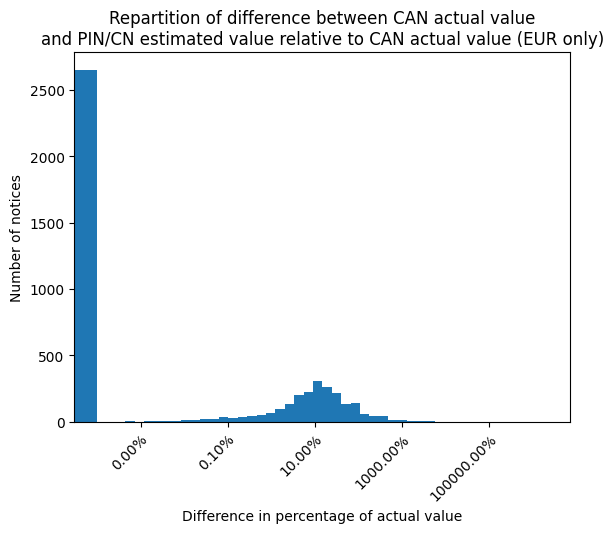

In [96]:
filter_ = (proc_df["can_max_value_currency"] == "EUR") & (proc_df["pin_cn_estimated_value_currency"] == "EUR") & (
        proc_df["pin_cn_estimated_value"].notna() & proc_df["can_max_value"].notna())
data = (100 * (proc_df[filter_]["can_max_value"] - proc_df[filter_]["pin_cn_estimated_value"]) / proc_df[filter_][
    "can_max_value"]).abs()

plt.hist(data, [0.] + list(np.logspace(np.log10(data.min() + 0.0001), np.log10(data.max()), 49)))
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x:.2f}%"))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title(
    f"Repartition of difference between CAN actual value\nand PIN/CN estimated value relative to CAN actual value (EUR only)")
plt.xlabel("Difference in percentage of actual value")
plt.ylabel("Number of notices")
plt.show()

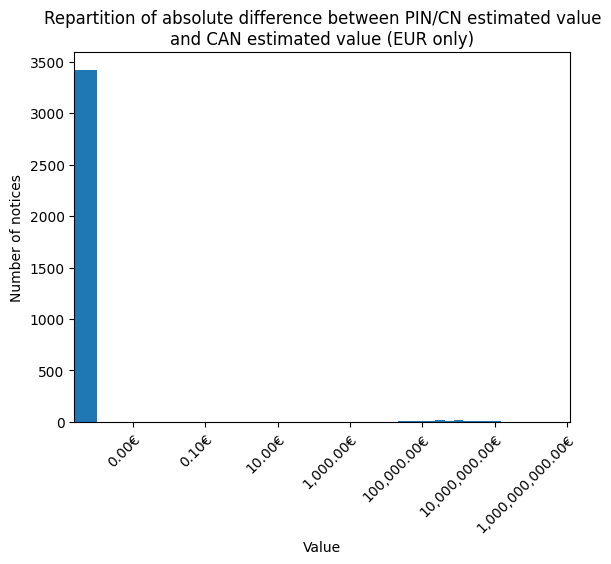

In [97]:
filter_ = (proc_df["can_estimated_value_currency"] == "EUR") & (proc_df["pin_cn_estimated_value_currency"] == "EUR") & (
        proc_df["pin_cn_estimated_value"].notna() & proc_df["can_estimated_value"].notna())
data = (proc_df[filter_]["pin_cn_estimated_value"] - proc_df[filter_]["can_estimated_value"]).abs()

plt.hist(data, bins=[0.] + list(np.logspace(np.log10(data.min() + 0.0001), np.log10(data.max()), 49)))
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x:,.2f}€"))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.title(f"Repartition of absolute difference between PIN/CN estimated value\nand CAN estimated value (EUR only)")
plt.xlabel("Value")
plt.ylabel("Number of notices")
plt.show()

In [98]:
zero_count = (data == 0.).sum()
print(f"{100 * zero_count / len(proc_df[filter_])}% of procurements with difference of 0")

96.63746821135913% of procurements with difference of 0


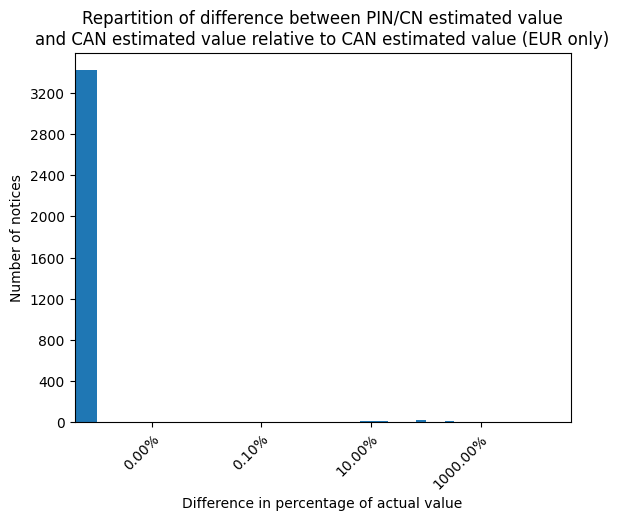

In [99]:
filter_ = (proc_df["can_estimated_value_currency"] == "EUR") & (proc_df["pin_cn_estimated_value_currency"] == "EUR") & (
        proc_df["pin_cn_estimated_value"].notna() & proc_df["can_max_value"].notna())
data = (100 * (proc_df[filter_]["pin_cn_estimated_value"] - proc_df[filter_]["can_estimated_value"]) / proc_df[filter_][
    "can_estimated_value"]).abs()

plt.hist(data, bins=[0.] + list(np.logspace(np.log10(data.min() + 0.0001), np.log10(data.max()), 49)))
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x:.2f}%"))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(integer=True))
plt.title(
    f"Repartition of difference between PIN/CN estimated value\nand CAN estimated value relative to CAN estimated value (EUR only)")
plt.xlabel("Difference in percentage of actual value")
plt.ylabel("Number of notices")
plt.show()